In [1]:
import tensorflow.keras as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
mnist = tf.datasets.mnist
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

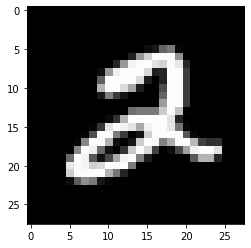

In [7]:
plt.imshow(xtrain[5], cmap='gray')
plt.show()

In [8]:
import pandas as pd

In [10]:
xtrain = xtrain/255
xtest = xtest/255

In [9]:
model = tf.models.Sequential()

model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(784,activation="relu"))
model.add(tf.layers.Dense(10,activation="softmax"))

model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [11]:
model.fit(xtrain, ytrain, epochs=15, validation_data=(xtest, ytest))

Epoch 1/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1903 - accuracy: 0.9434 - val_loss: 0.0981 - val_accuracy: 0.9690
Epoch 2/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0758 - accuracy: 0.9764 - val_loss: 0.0713 - val_accuracy: 0.9776
Epoch 3/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0496 - accuracy: 0.9840 - val_loss: 0.0791 - val_accuracy: 0.9772
Epoch 4/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0335 - accuracy: 0.9889 - val_loss: 0.0679 - val_accuracy: 0.9791
Epoch 5/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.0758 - val_accuracy: 0.9791
Epoch 6/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0700 - val_accuracy: 0.9824
Epoch 7/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0683 -

In [12]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 13s 6ms/step - loss: 0.1088 - accuracy: 0.9811


[0.10877435654401779, 0.9811000227928162]

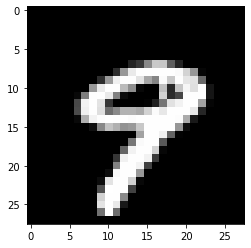

In [13]:
plt.imshow(xtest[9], cmap="gray")
plt.show()

In [14]:
ytest[9]

9

In [15]:
y_pred = model.predict(xtest)

In [17]:
from sklearn.metrics import accuracy_score
a = accuracy_score(ytest, np.argmax(y_pred, axis=1))
a

0.9811

In [18]:
model.save('mnist.h5')

In [19]:
my_model = tf.models.load_model("mnist.h5")